In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from load_data import get_data
from graphs import get_summed_plot

# Hard-Coded Area:

In [22]:
# Make the plot prettier - legend, axis, size, 3 plots in one?
def get_summed_plot(df, agg = 'mean'):
    grouped_by_visit = df.groupby('visit_number', as_index = False).agg({'time' : 'mean', 'total_clearance_between_visit' : 'mean', 'clearance_between_visit' : 'mean'}, as_index = False)
    visits = [0] + list(grouped_by_visit['visit_number'])
    summed_clearances = [0] + list(grouped_by_visit['total_clearance_between_visit'])
    # plt.figure(figsize=(15,5))
    plt.plot(visits, summed_clearances)
    plt.xlabel('visit number')
    plt.ylabel('mean total_clearance_between_visit')

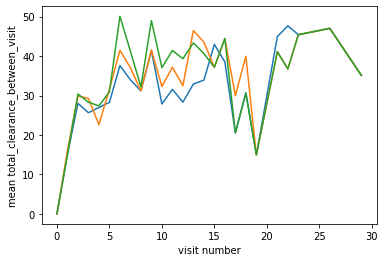

In [23]:
non_moved_df = get_data(format_type='all')
moved_df = get_data(format_type='moved_to_0')
non0s_df = get_data(format_type='all_without_0s')
get_summed_plot(non_moved_df)
get_summed_plot(moved_df)
get_summed_plot(non0s_df)

# Exploratory area:
### Few notes:
* The table above should include all information You need
* `wizyta po ilu zabiegach` -> can have some skipped zabiegy & can start at other point than 0
* `czas` -> defined as czas between this and next visit